In [2]:
library(cluster)
library(NbClust)
library(kohonen)
library(ggplot2)
library(gridExtra)
library(scales)

In [7]:
lowsig <- read.csv("C:/총_지역적인구분석(위험만).csv")
head(lowsig)

지역,소멸비율,관광.여가.오락,부동산,생활서비스,학문.교육,소멸지역여부
경상북도 의성군,0.3139632,24,13,389,61,소멸위험지역
경상북도 의성군,0.3156284,26,14,407,66,소멸위험지역
경상북도 의성군,0.3180173,26,15,425,62,소멸위험지역
경상북도 의성군,0.3230777,26,15,424,62,소멸위험지역
전라남도 고흥군,0.3326796,34,17,514,96,소멸위험지역
전라남도 고흥군,0.3329543,34,17,514,96,소멸위험지역


In [28]:
library(caret)
set.seed(7829)

idx <- createDataPartition(y=lowsig$지역, p=0.7, list = F) 
# list = T를 하면 안되는데 이유는 나중에 공부하도록 하자
train <- lowsig[idx,]
test <- lowsig[-idx,]

head(train)
head(test)

Warning message in createDataPartition(y = lowsig$지역, p = 0.7, list = F):
"Some classes have a single record ( 충청남도 보령시  ) and these will be selected for the sample"

지역,소멸비율,관광.여가.오락,부동산,생활서비스,학문.교육,소멸지역여부
경상북도 의성군,0.3139632,24,13,389,61,소멸위험지역
경상북도 의성군,0.3156284,26,14,407,66,소멸위험지역
경상북도 의성군,0.3180173,26,15,425,62,소멸위험지역
경상북도 의성군,0.3230777,26,15,424,62,소멸위험지역
전라남도 고흥군,0.3326796,34,17,514,96,소멸위험지역
전라남도 고흥군,0.3329543,34,17,514,96,소멸위험지역


,지역,소멸비율,관광.여가.오락,부동산,생활서비스,학문.교육,소멸지역여부
8,전라남도 고흥군,0.3354076,29,14,495,89,소멸위험지역
12,경상북도 의성군,0.3394598,20,14,395,58,소멸위험지역
13,경상북도 의성군,0.3437643,15,6,315,52,소멸위험지역
14,경상북도 군위군,0.3445397,17,14,146,17,소멸위험지역
24,경상북도 군위군,0.3559399,17,14,144,23,소멸위험지역
26,경상남도 합천군,0.3568455,43,12,320,75,소멸위험지역


In [29]:
train.data <- scale(train[, 3:6])
summary(train.data)

head(train.data)

 관광.여가.오락        부동산          생활서비스        학문.교육      
 Min.   :-1.5469   Min.   :-1.1537   Min.   :-1.4969   Min.   :-1.0838  
 1st Qu.:-0.6944   1st Qu.:-0.6135   1st Qu.:-0.7290   1st Qu.:-0.6158  
 Median :-0.2208   Median :-0.3819   Median :-0.2061   Median :-0.2881  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3949   3rd Qu.: 0.3512   3rd Qu.: 0.3310   3rd Qu.: 0.1566  
 Max.   : 5.0363   Max.   : 4.2485   Max.   : 3.6569   Max.   : 4.4745  

,관광.여가.오락,부동산,생활서비스,학문.교육
1,-0.50492286,-0.6520434,0.09069463,-0.44023926
2,-0.41020059,-0.6134567,0.17549313,-0.38173045
3,-0.41020059,-0.5748700,0.26029163,-0.42853750
4,-0.41020059,-0.5748700,0.25558060,-0.42853750
5,-0.03131152,-0.4976965,0.67957310,-0.03067759
6,-0.03131152,-0.4976965,0.67957310,-0.03067759


In [32]:
lowsig.km <- kmeans(train.data, centers = 3, iter.max = 10000)
lowsig.km$centers

,관광.여가.오락,부동산,생활서비스,학문.교육
1,-0.6329860,-0.5684621,-0.6060273,-0.5662972
2,1.9586200,1.2586218,2.0931094,2.0699774
3,0.3795963,0.5593623,0.2682871,0.2008854


                    
                     1 2 3
  강원도 고성군      7 0 0
  강원도 양양군      7 0 0
  강원도 영월군      4 0 3
  강원도 정선군      1 0 6
  강원도 평창군      0 0 7
  강원도 홍천군      0 2 0
  강원도 횡성군      0 0 7
  경상남도 거창군    0 0 7
  경상남도 고성군    0 0 7
  경상남도 남해군    5 0 2
  경상남도 밀양시    0 7 0
  경상남도 산청군    7 0 0
  경상남도 의령군    7 0 0
  경상남도 창녕군    0 0 7
  경상남도 하동군    1 0 6
  경상남도 함양군    7 0 0
  경상남도 합천군    5 0 2
  경상북도 고령군    7 0 0
  경상북도 군위군    7 0 0
  경상북도 문경시    0 6 1
  경상북도 봉화군    7 0 0
  경상북도 상주시    0 7 0
  경상북도 성주군    7 0 0
  경상북도 영덕군    4 0 3
  경상북도 영양군    7 0 0
  경상북도 영주시    0 5 0
  경상북도 영천시    0 7 0
  경상북도 예천군    7 0 0
  경상북도 울릉군    3 0 0
  경상북도 울진군    1 0 6
  경상북도 의성군    7 0 0
  경상북도 청도군    7 0 0
  경상북도 청송군    7 0 0
  인천광역시 강화군  0 0 7
  인천광역시 옹진군  7 0 0
  전라남도 강진군    7 0 0
  전라남도 고흥군    2 0 5
  전라남도 곡성군    7 0 0
  전라남도 구례군    7 0 0
  전라남도 담양군    7 0 0
  전라남도 보성군    7 0 0
  전라남도 신안군    7 0 0
  전라남도 영광군    3 0 4
  전라남도 영암군    2 0 3
  전라남도 완도군    7 0 0
  전라남도 장성군    7 0 0
  전라남도 장흥군    7 0 0
  전라남도 

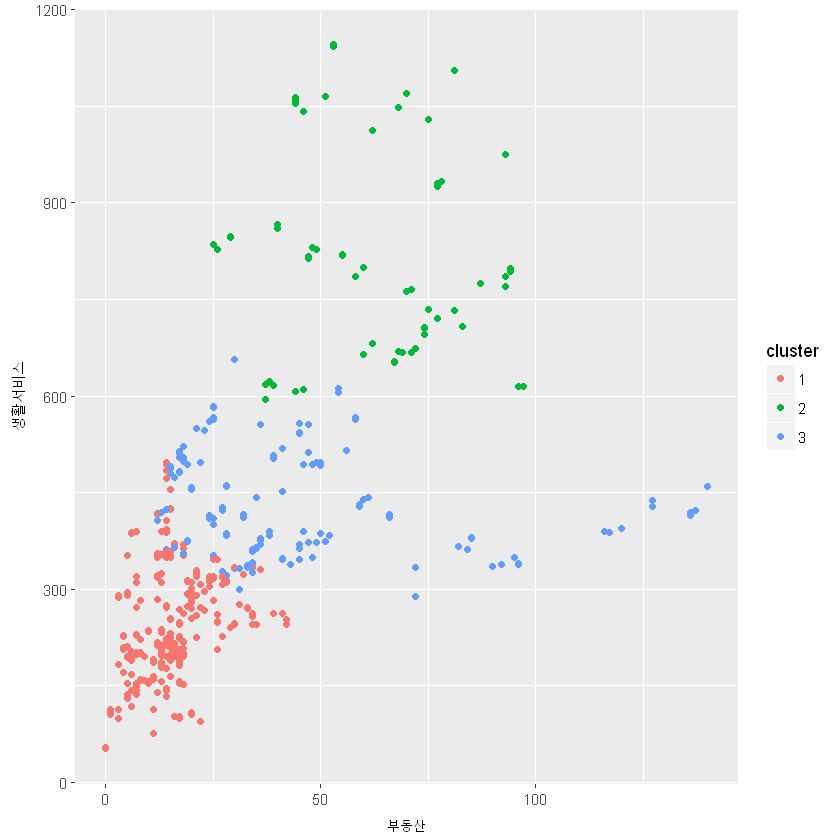

In [36]:
train$cluster <- as.factor(lowsig.km$cluster)
qplot(부동산, 생활서비스, color = cluster, data=train)
table(train$지역, train$cluster)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


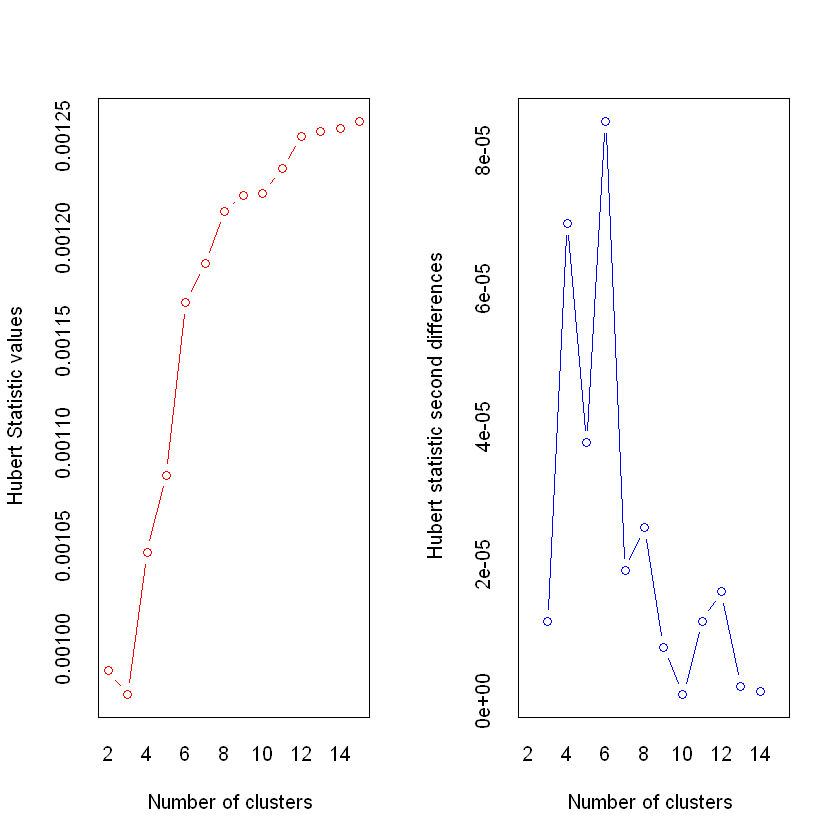

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 3 proposed 13 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

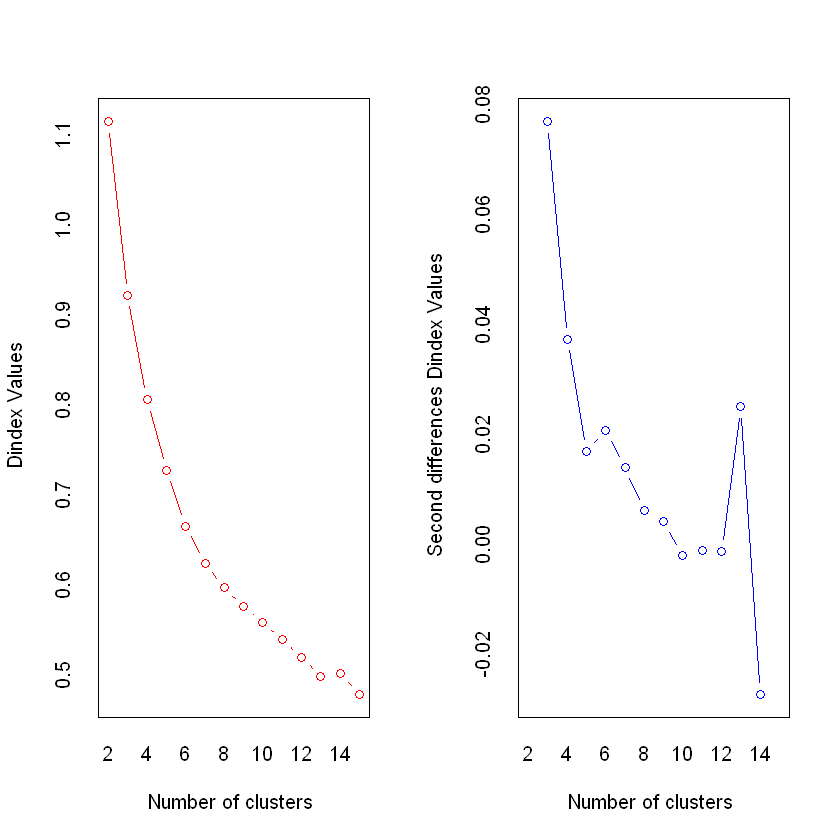

In [38]:
nc <- NbClust(train.data, min.nc = 2, max.nc = 15, method="kmeans")

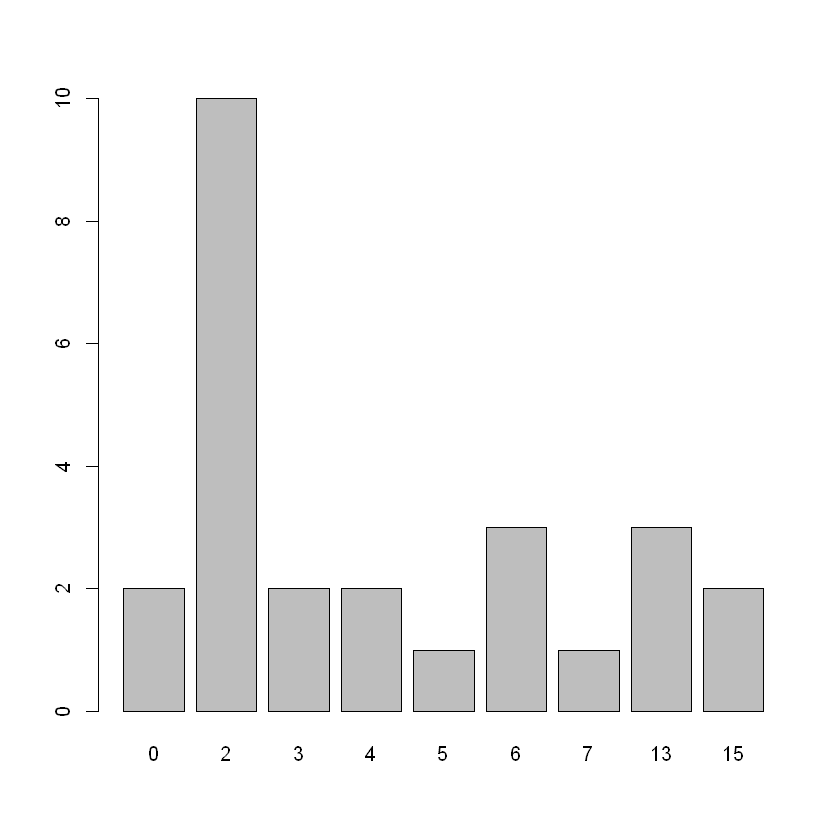

In [40]:
par(mfrow=c(1, 1))
barplot(table(nc$Best.n[1, ]))

                    
                     1 2
  강원도 고성군      7 0
  강원도 양양군      7 0
  강원도 영월군      7 0
  강원도 정선군      7 0
  강원도 평창군      0 7
  강원도 홍천군      0 2
  강원도 횡성군      1 6
  경상남도 거창군    5 2
  경상남도 고성군    3 4
  경상남도 남해군    7 0
  경상남도 밀양시    0 7
  경상남도 산청군    7 0
  경상남도 의령군    7 0
  경상남도 창녕군    4 3
  경상남도 하동군    7 0
  경상남도 함양군    7 0
  경상남도 합천군    7 0
  경상북도 고령군    7 0
  경상북도 군위군    7 0
  경상북도 문경시    0 7
  경상북도 봉화군    7 0
  경상북도 상주시    0 7
  경상북도 성주군    7 0
  경상북도 영덕군    7 0
  경상북도 영양군    7 0
  경상북도 영주시    0 5
  경상북도 영천시    0 7
  경상북도 예천군    7 0
  경상북도 울릉군    3 0
  경상북도 울진군    7 0
  경상북도 의성군    7 0
  경상북도 청도군    7 0
  경상북도 청송군    7 0
  인천광역시 강화군  1 6
  인천광역시 옹진군  7 0
  전라남도 강진군    7 0
  전라남도 고흥군    7 0
  전라남도 곡성군    7 0
  전라남도 구례군    7 0
  전라남도 담양군    7 0
  전라남도 보성군    7 0
  전라남도 신안군    7 0
  전라남도 영광군    7 0
  전라남도 영암군    5 0
  전라남도 완도군    7 0
  전라남도 장성군    7 0
  전라남도 장흥군    7 0
  전라남도 진도군    7 0
  전라남도 함평군    7 0
  전라남도 해남군    5 2
  전라남도 화순군    0 3
  전라북도 고창군    7 0
  전라북도 김제시   

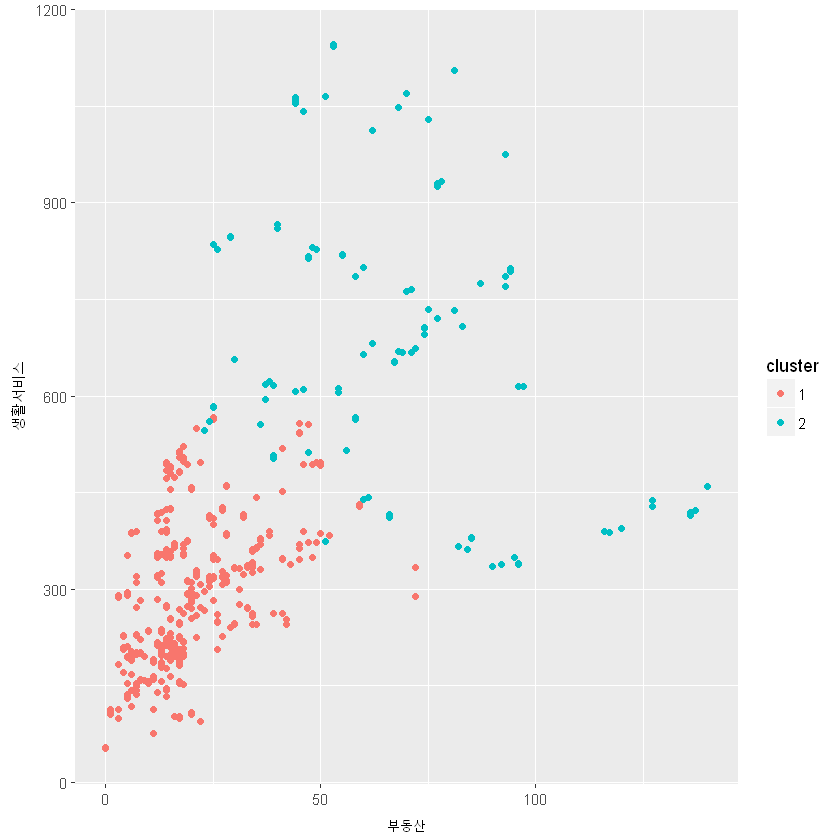

In [42]:
lowsig.km <- kmeans(train.data, centers = 2, iter.max = 10000)
train$cluster <- as.factor(lowsig.km$cluster)
qplot(부동산, 생활서비스, color=cluster, data=train)
table(train$지역, train$cluster)